In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datos/gym.csv")

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


About Dataset
This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. 
It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, 
and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive 
analysis of fitness patterns, athlete progression, and health trends.

Key Features:

Age: Age of the gym member.  
Gender: Gender of the gym member (Male or Female).  
Weight (kg): Member’s weight in kilograms.  
Height (m): Member’s height in meters.  
Max_BPM: Maximum heart rate (beats per minute) during workout sessions.  
Avg_BPM: Average heart rate during workout sessions.  
Resting_BPM: Heart rate at rest before workout.  
Session_Duration (hours): Duration of each workout session in hours.  
Calories_Burned: Total calories burned during each session.  
Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).  
Fat_Percentage: Body fat percentage of the member.  
Water_Intake (liters): Daily water intake during workouts.  
Workout_Frequency (days/week): Number of workout sessions per week.  
Experience_Level: Level of experience, from beginner (1) to expert (3).  
BMI: Body Mass Index, calculated from height and weight.  


This dataset is ideal for data scientists, health researchers, and fitness enthusiasts interested in studying exercise habits, modeling fitness progression, or analyzing the relationship between demographic and physiological data. With a wide range of variables, it offers insights into how different factors affect workout intensity, endurance, and overall health.

In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Como podemos observar no encontramos valores Nulos en el Dataset, por lo cual nos ahorramos la necesidad de limpiar esta informacion.

In [5]:
dfage = df.groupby('Gender')['Age'].mean()
dfage
#edad Promedio

Gender
Female    38.335498
Male      38.998043
Name: Age, dtype: float64

El promedio de edad entre los participantes hombres y mujeres es muy similar. 

In [6]:
dfage = df.groupby('Gender')['Height (m)'].max()
dfage
#edad maxima por genero

Gender
Female    1.8
Male      2.0
Name: Height (m), dtype: float64

In [7]:
dfage = df.groupby('Gender')['Height (m)'].min()
dfage

Gender
Female    1.5
Male      1.6
Name: Height (m), dtype: float64

Asi mismo, las edades maximas y minimas son las mismas, para cada caso de genero lo cual nos permitira comparar valores entre ellos con un mejor margen de error. 

In [12]:
dfmales = df[df['Gender'] == 'Male']

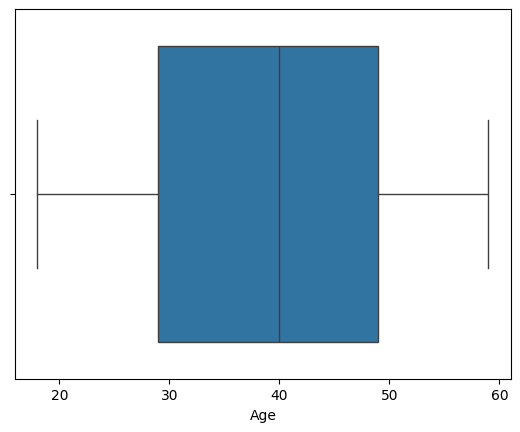

In [13]:
sns.boxplot(x=dfmales['Age']) 
plt.show()

In [52]:
df_m_dur_sec = dfmales.groupby('Age')['Session_Duration (hours)'].mean().reset_index()
df_m_dur_sec.head()

,Age,Session_Duration (hours)
0,18,1.271667
1,19,1.274000
2,20,1.185000
3,21,1.315833
4,22,1.215000


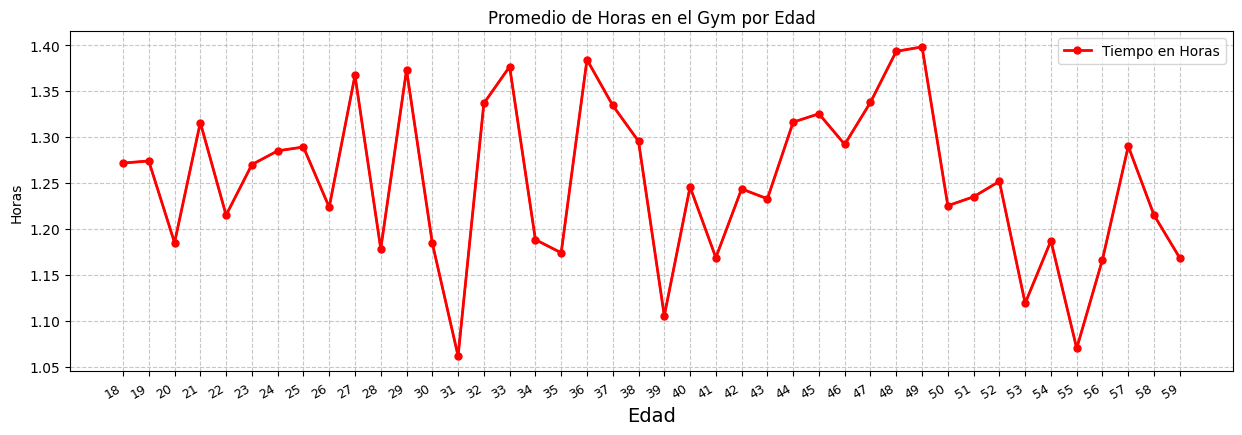

In [51]:
Xpos = df_m_dur_sec['Age']
Ypos = df_m_dur_sec['Session_Duration (hours)']


plt.figure( figsize = (15, 5) )
plt.plot(Xpos,Ypos, 'r')
plt.title("Promedio de Horas en el Gym por Edad")
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Horas')
plt.plot(Xpos, Ypos, color='red', linewidth=2, marker='o', markersize=5, label='Tiempo en Horas')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(Xpos, rotation=90, ha='right', fontsize=9)
plt.yticks(fontsize=10)

plt.gcf().autofmt_xdate()
plt.show()

las sesiones de entrenamiento para todas las edades se encuentran en un rango entre 1.05h y 1.40h, lo cual representan un rango razonable de trabajo para cada participante. No se considera necesario limpiar ningun dato a partir de este ejemplo.  

In [53]:
dfconteo = dfmales.groupby('Age')['Session_Duration (hours)'].count()

In [55]:
dfconteo.mean()

np.float64(12.166666666666666)

Aqui conseguimos que el primedio de aprticipantes por edad es de 12 personas. 

In [56]:
dfconteo.quantile(0.5)

np.float64(12.0)

Asi mismo, La media se encuentra bastante cerca del Promedio, para igualar dichos datos necesitariamos reducir todos los datos al volumen de la Edad con menos informacion, que es 4, por enden perderiamos un porcentaje de informacion demasiado importante para siquiera considerarlo. 

In [57]:
dfconteo

Age
18    12
19    10
20    14
21    12
22    14
23    12
24     4
25    12
26    11
27    14
28    12
29    16
30    11
31     6
32    15
33     6
34    12
35    10
36    14
37     9
38    11
39    13
40    14
41    16
42    14
43    18
44     8
45    15
46    10
47    14
48     9
49    16
50    17
51     8
52    17
53    11
54    14
55    11
56    18
57    11
58     8
59    12
Name: Session_Duration (hours), dtype: int64

In [64]:
dffemale = df[df['Gender'] == 'Female']

In [65]:
df_f_dur_sec = dffemale.groupby('Age')['Session_Duration (hours)'].mean().reset_index()
df_f_dur_sec.head()

,Age,Session_Duration (hours)
0,18,1.265333
1,19,1.283125
2,20,1.154545
3,21,1.288750
4,22,1.399231


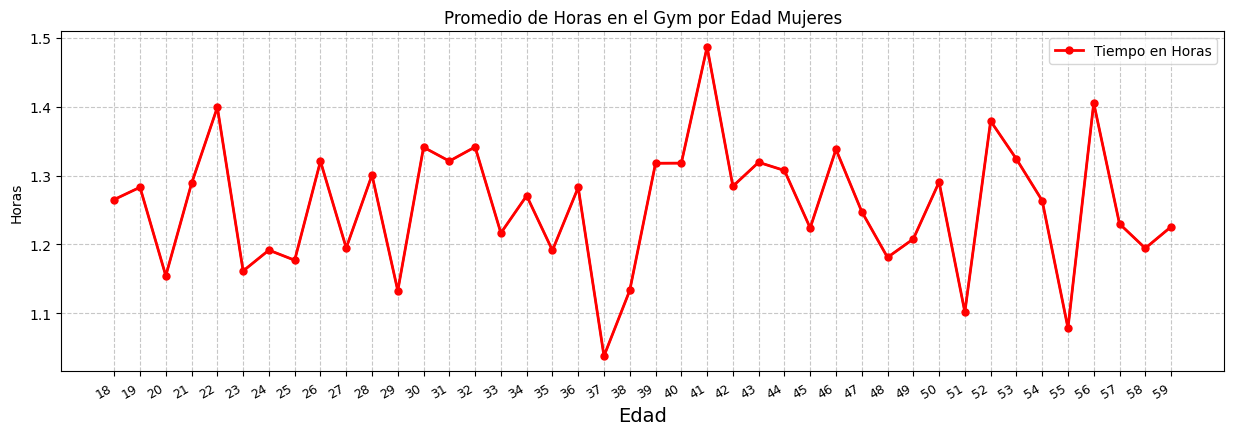

In [66]:
Xpos = df_f_dur_sec['Age']
Ypos = df_f_dur_sec['Session_Duration (hours)']


plt.figure( figsize = (15, 5) )
plt.plot(Xpos,Ypos, 'r')
plt.title("Promedio de Horas en el Gym por Edad Mujeres")
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Horas')
plt.plot(Xpos, Ypos, color='red', linewidth=2, marker='o', markersize=5, label='Tiempo en Horas')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(Xpos, rotation=90, ha='right', fontsize=9)
plt.yticks(fontsize=10)

plt.gcf().autofmt_xdate()
plt.show()

En cuanto a las mujeres seguimos teniendo valores dentro de los rangos normales de entrenamiento, al menos en suu promedio, ningun valor que se salga se aleje de la realidad o parezca anormal. 

In [67]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

Dentro de los tipos de entrenamiento encontramos unicamente 4 variables las cuales son Yoga, entrenamiento de alta intensidad a intervalos(HIIT), Cardio, y Fuerza. no es necesario hacer cambios limpieza o regulacion de estos datos. 

In [68]:

df['Experience_Level'].unique()

array([3, 2, 1])

In [69]:
df['Experience_Level'].count()

np.int64(973)

In [70]:
df.groupby('Experience_Level')['Age'].count()

Experience_Level
1    376
2    406
3    191
Name: Age, dtype: int64

Tenemos 3 niveles de experiencia siendo los mas experimentados el volumen de datos mas pequeno.

In [76]:
dfexp = dfmales.groupby(['Experience_Level','Age','Gender'])['BMI'].count()
dfexp[1].count()

np.int64(42)

In [77]:
dfexp[2].count()

np.int64(41)

In [1]:
dfexp[3].count()

NameError: name 'dfexp' is not defined

al hacer un conteo en los 3 niveles, podemos observar que hay edades que no estan incluidas en los 3 segmentos, faltandole 1 edad el nivel 2, y 2 edades al nivel 3. esta informacion solo la saque para tenerla en cuenta en futuros analisis. donde quiera comparar datos entre niveles de experiencia. 

In [4]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import LabelEncoder

dfml = df

# Codificar las variables categóricas
label_encoder = LabelEncoder()
dfml['Gender'] = label_encoder.fit_transform(dfml['Gender'])
dfml['Workout_Type'] = label_encoder.fit_transform(dfml['Workout_Type'])


In [18]:
dfml.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


# Gender 0 = Female 1 = Male,   Workout_Type 0= Cardio, 1 = HIIT, 2 = Strength, 3 = Yoga

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleccionamos los Conjuntos de Datos para usar.
X = dfml.drop(['Gender'], axis=1)  
Y = dfml['Gender']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definimos las metricas para Evaluar Cada Modelo.
def model_error (Y_test, Y_pred):
    #Evaluar modelo
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    #imprimir Resultados
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    # Crear un DataFrame con los resultados
    results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}).reset_index(drop=True)
    
    # Mostrar el DataFrame
    print(results)


In [30]:
# Entrenar Modelo
model_grad = GradientBoostingClassifier(random_state=42)
model_grad.fit(X_train, Y_train)

#Predecir
Y_pred = model_grad.predict(X_test)

model_error(Y_test, Y_pred)

Accuracy: 0.98
Precision: 0.99
Recall: 0.97
F1 Score: 0.98
     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
190       0          0
191       0          0
192       0          0
193       1          1
194       1          1

[195 rows x 2 columns]


In [28]:
import joblib
# Guardar el modelo en un archivo
joblib.dump(model_grad, '../models/gym_model.joblib')
print("Modelo guardado en 'gym_model.joblib'")

Modelo guardado en 'gym_model.joblib'
